<a href="https://colab.research.google.com/github/CharleneLimKH/python-mini-exercises/blob/main/Week_3_Assignment_3_Quantum_Circuits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
! pip install qiskit qiskit-aer

In [53]:
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit.providers.aer import AerSimulator
from qiskit.providers.fake_provider import FakeGuadalupeV2
from qiskit_aer.noise import NoiseModel

# Fetch backend and noise model
fake_device = FakeGuadalupeV2()
noise_model = NoiseModel.from_backend(fake_device)





In [54]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0]) #apply hadamard gate to create entanglement
circuit.cx(qreg_q[0], qreg_q[1]) #apply cNot gate on q[0] to create entanglement
circuit.cx(qreg_q[1], qreg_q[2])

In [55]:
%matplotlib inline

In [66]:
circuit.draw()

┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2

In [60]:
circuit.measure(qreg_q, creg_c) #measure qubit in quantim register and store them in classical register

In [61]:
simulator = AerSimulator(noise_model=noise_model) #simulation of quantum circuit in classical computer

In [64]:
from qiskit.execute_function import execute
result = execute(circuit, backend = simulator).result()


In [71]:
from qiskit.primitives.backend_sampler import BackendSampler #get code from https://qiskit.org/documentation/how_to/use_sampler.html
from qiskit.primitives import Sampler
sampler = BackendSampler(simulator)
job = sampler.run(circuit)
result = job.result()
print(result)


SamplerResult(quasi_dists=[{6: 0.0087890625, 4: 0.0078125, 5: 0.017578125, 1: 0.017578125, 3: 0.0078125, 7: 0.4599609375, 2: 0.0078125, 0: 0.47265625}], metadata=[{'shots': 1024}])


In [72]:
quasi_dist = result.quasi_dists[0]
print(quasi_dist)

{6: 0.0087890625, 4: 0.0078125, 5: 0.017578125, 1: 0.017578125, 3: 0.0078125, 7: 0.4599609375, 2: 0.0078125, 0: 0.47265625}


In [48]:
from qiskit.tools.visualization import plot_histogram

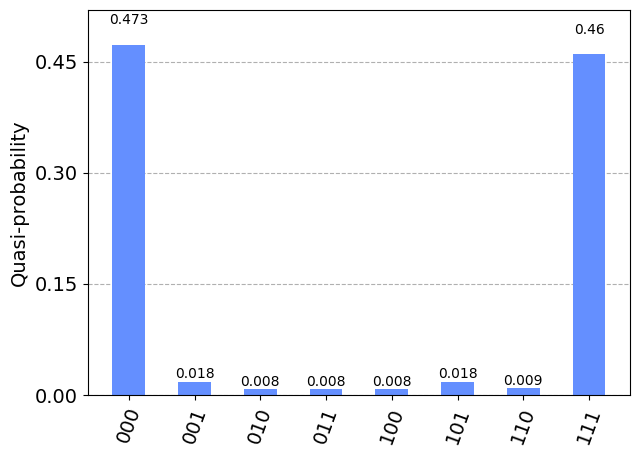

In [74]:
plot_histogram(quasi_dist.binary_probabilities())

In [ ]:
#plot_histogram(result.get_counts(circuit))